# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

In [2]:
act_df=pd.read_csv("../data/act.csv", index_col=0)
sat_df=pd.read_csv("../data/sat.csv", index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [3]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

The `State` column contains the name of the given state, commonwealth, or district. The ACT data includes an extra row corresponding to National average scores.

The `Participation` is the percentage of high school graduates in that given year that took the SAT or ACT.

The `Total` and `Composite` scores are the sums of all the component sections of the given test.  

The remaining columns correspond to scores on the constituent sections of a given test.


##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [5]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [6]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [7]:
act_df.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9
Composite,52.0,21.509615,2.002083,17.8,19.800,21.40,23.600,25.5


The minimum values for the SAT Math test and the ACT Science test are very low.

In [8]:
act_df[act_df['Science'] < 10]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [9]:
sat_df[sat_df['Math'] < 400]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Not only are the ACT Science score and SAT Math scores low for Mayland, the Total SAT doesn't add up for Maryland.

Something is very wrong here.

In [10]:
total_computed_sat = sat_df['Math'] + sat_df['Evidence-Based Reading and Writing']

In [11]:
sat_df[abs(total_computed_sat - sat_df['Total']) > 0]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
15,Iowa,2%,641,635,1275
18,Louisiana,4%,611,586,1198
20,Maryland,69%,536,52,1060
21,Massachusetts,76%,555,551,1107
22,Michigan,100%,509,495,1005
24,Mississippi,2%,634,607,1242
27,Nebraska,3%,629,625,1253


In [12]:
sat_df[abs(total_computed_sat - sat_df['Total']) >= 2]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


So some of the Total scores for SAT are off by $1$, but this seems like it could just be a result of rounding. I am willing to, for now, assume that the differences other than Maryland are due to rounding as they're all fairly small.

Maryland seems to have some issues with entering their data--there is no way that these scores are that low! Also the `Total` score is not at all consistent with the `Math` score. According to the SAT source the correct `Math` SAT score for Maryland is $524$. Similary the correct `Science` ACT score is $23.2$.

In [13]:
sat_df[sat_df['State']=='Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [14]:
sat_df.at[20, 'Math'] = 524

In [15]:
sat_df[sat_df['State']=='Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [16]:
act_df[act_df['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [17]:
act_df.at[21, 'Science'] = 23.2

In [18]:
act_df[act_df['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6



##### 5. Print the types of each column.

In [19]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [20]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In both dataframes, State and Participation are both strings, the rest are numeric (either float or int).

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

The `Participation` column would probably be more useful as a float.

In [21]:
act_df['Participation'] = act_df['Participation'].apply(lambda x: float(x.replace('%','')))

In [22]:
sat_df['Participation'] = sat_df['Participation'].apply(lambda x: float(x.replace('%','')))

In [23]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 5.8+ KB


In [24]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.9+ KB


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [25]:
from collections import defaultdict

In [26]:
def create_state_dict(df):
    df_dict = defaultdict(dict)

    def score_recorder(row,subject):
        df_dict[subject][row['State']] = row[subject]

    for subject in act_df.columns:
        act_df.apply(lambda x: score_recorder(x,subject), axis = 1);
    return df_dict

In [27]:
act_dict = create_state_dict(act_df)
sat_dict = create_state_dict(sat_df)

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [28]:
act_columns = {key:act_df[key] for key in act_df.columns}
sat_Columns = {key:sat_df[key] for key in sat_df.columns}

##### 9. Merge the dataframes on the state column.

In [29]:
combined = pd.merge(sat_df,act_df,on='State',suffixes=['_SAT','_ACT'])

In [30]:
combined.head()

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

The only column names that were not suffixed when merging are   
>`Evidence-Based Reading and Writing` and `Total` for SAT  
>`English`, `Reading`, `Science`, and `Composite` for ACT  

In [31]:
rename = {
    'Evidence-Based Reading and Writing': 'Evidence-Based Reading and Writing_SAT',
    'Total': 'Total_SAT',
    
    'English': 'English_ACT',
    'Reading': 'Reading_ACT',
    'Science': 'Science_ACT',
    'Composite': 'Composite_ACT'
}
combined.rename(mapper=rename, axis=1, inplace=True)

In [32]:
combined.head()

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [33]:
agg = combined.describe()
for column in agg.columns:
    mx, mn = agg[column].loc[['max','min']]
    print(f'The maximum statewide average for {column}: {mx}')
    print(f'The minimum statewide average for {column}: {mn}\n')

The maximum statewide average for Participation_SAT: 100.0
The minimum statewide average for Participation_SAT: 2.0

The maximum statewide average for Evidence-Based Reading and Writing_SAT: 644.0
The minimum statewide average for Evidence-Based Reading and Writing_SAT: 482.0

The maximum statewide average for Math_SAT: 651.0
The minimum statewide average for Math_SAT: 468.0

The maximum statewide average for Total_SAT: 1295.0
The minimum statewide average for Total_SAT: 950.0

The maximum statewide average for Participation_ACT: 100.0
The minimum statewide average for Participation_ACT: 8.0

The maximum statewide average for English_ACT: 25.5
The minimum statewide average for English_ACT: 16.3

The maximum statewide average for Math_ACT: 25.3
The minimum statewide average for Math_ACT: 18.0

The maximum statewide average for Reading_ACT: 26.0
The minimum statewide average for Reading_ACT: 18.1

The maximum statewide average for Science_ACT: 24.9
The minimum statewide average for Scien

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [34]:
def stdev(lst):
    n = len(lst)
    mu = sum(lst)/n
    s = sum((x-mu)**2 for x in lst)
    return np.sqrt((s/n))

In [35]:
sd = [stdev(combined[key]) for key in combined.select_dtypes(exclude='object').columns]

In [36]:
sd

[34.92907076664508,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7222161451443676,
 2.000786081581989]

Because I don't really trust these things to be ordered consistently I'm just going to use a dictionary.

In [37]:
sd2 = {key:stdev(combined[key]) for key in combined.select_dtypes(exclude='object').columns}

In [38]:
sd2

{'Participation_SAT': 34.92907076664508,
 'Evidence-Based Reading and Writing_SAT': 45.21697020437866,
 'Math_SAT': 46.65713364485503,
 'Total_SAT': 91.58351056778743,
 'Participation_ACT': 31.824175751231806,
 'English_ACT': 2.3304876369363363,
 'Math_ACT': 1.9624620273436781,
 'Reading_ACT': 2.0469029314842646,
 'Science_ACT': 1.7222161451443676,
 'Composite_ACT': 2.000786081581989}

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [39]:
sd2['State'] = 'Standard Deviation'

In [40]:
sd_row = pd.DataFrame(sd2, index=[0])

In [41]:
combined_wsd = pd.concat(
    objs=[combined,sd_row],
    ignore_index=True
    )

In [42]:
combined_wsd.head()

,Composite_ACT,English_ACT,Evidence-Based Reading and Writing_SAT,Math_ACT,Math_SAT,Participation_ACT,Participation_SAT,Reading_ACT,Science_ACT,State,Total_SAT
0,19.2,18.9,593.0,18.4,572.0,100.0,5.0,19.7,19.4,Alabama,1165.0
1,19.8,18.7,547.0,19.8,533.0,65.0,38.0,20.4,19.9,Alaska,1080.0
2,19.7,18.6,563.0,19.8,553.0,62.0,30.0,20.1,19.8,Arizona,1116.0
3,19.4,18.9,614.0,19.0,594.0,100.0,3.0,19.7,19.5,Arkansas,1208.0
4,22.8,22.5,531.0,22.7,524.0,31.0,53.0,23.1,22.2,California,1055.0


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

I've sorted the DataFrame by Math SAT score, with the greatest scores appearing at the top.

In [43]:
combined_wsd.sort_values(by='Math_SAT', ascending=False).head()

,Composite_ACT,English_ACT,Evidence-Based Reading and Writing_SAT,Math_ACT,Math_SAT,Participation_ACT,Participation_SAT,Reading_ACT,Science_ACT,State,Total_SAT
23,21.5,20.4,644.0,21.5,651.0,100.0,3.0,21.8,21.6,Minnesota,1295.0
49,20.5,19.7,642.0,20.4,649.0,100.0,3.0,20.6,20.9,Wisconsin,1291.0
15,21.9,21.2,641.0,21.3,635.0,67.0,2.0,22.6,22.1,Iowa,1275.0
25,20.4,19.8,640.0,19.9,631.0,100.0,3.0,20.8,20.5,Missouri,1271.0
16,21.7,21.1,632.0,21.3,628.0,73.0,4.0,22.3,21.7,Kansas,1260.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [44]:
combined_wsd[combined_wsd['Math_SAT'] > 600].head()

,Composite_ACT,English_ACT,Evidence-Based Reading and Writing_SAT,Math_ACT,Math_SAT,Participation_ACT,Participation_SAT,Reading_ACT,Science_ACT,State,Total_SAT
15,21.9,21.2,641.0,21.3,635.0,67.0,2.0,22.6,22.1,Iowa,1275.0
16,21.7,21.1,632.0,21.3,628.0,73.0,4.0,22.3,21.7,Kansas,1260.0
17,20.0,19.6,631.0,19.4,616.0,100.0,4.0,20.5,20.1,Kentucky,1247.0
23,21.5,20.4,644.0,21.5,651.0,100.0,3.0,21.8,21.6,Minnesota,1295.0
24,18.6,18.2,634.0,18.1,607.0,100.0,2.0,18.8,18.8,Mississippi,1242.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

Text(0.5,0,'Participation Rate in ACT')

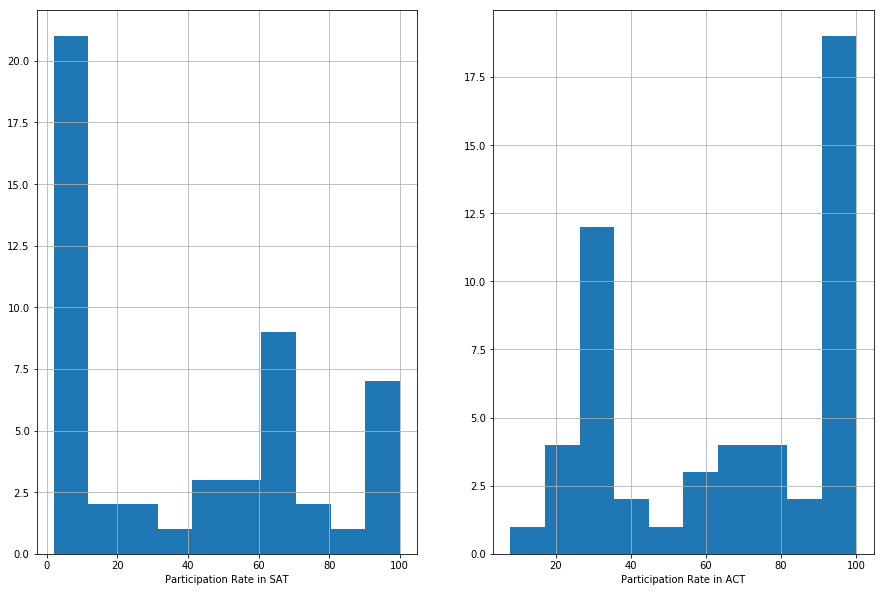

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sat_df['Participation'].hist(ax=ax[0])
ax[0].set_xlabel('Participation Rate in SAT')

act_df['Participation'].hist(ax=ax[1])
ax[1].set_xlabel('Participation Rate in ACT')


##### 17. Plot the Math(s) distributions from both data sets.

/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Distribution of Math Scores for ACT')

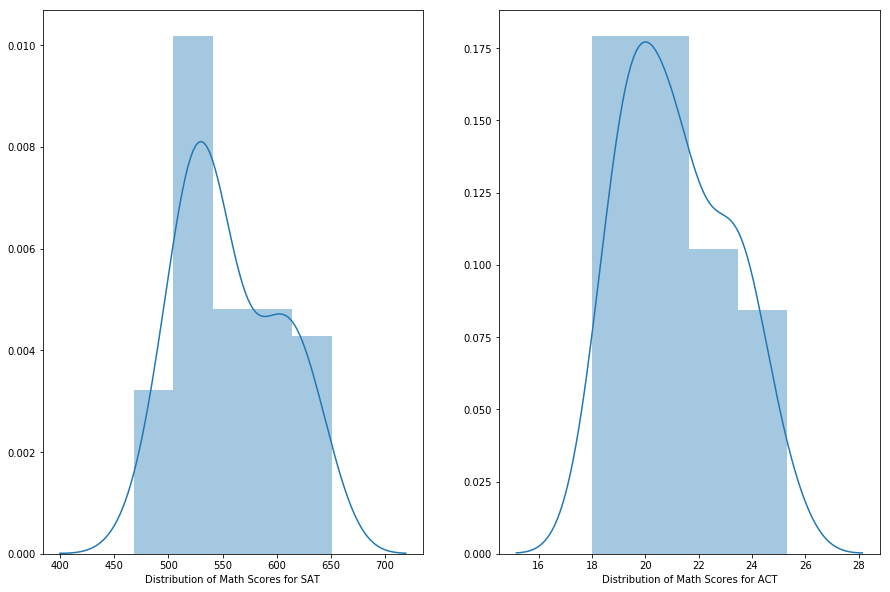

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sns.distplot(sat_df['Math'], ax=ax[0])
ax[0].set_xlabel('Distribution of Math Scores for SAT')

sns.distplot(act_df['Math'],ax=ax[1])
ax[1].set_xlabel('Distribution of Math Scores for ACT')


##### 18. Plot the Verbal distributions from both data sets.

/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Distribution of Math Scores for ACT')

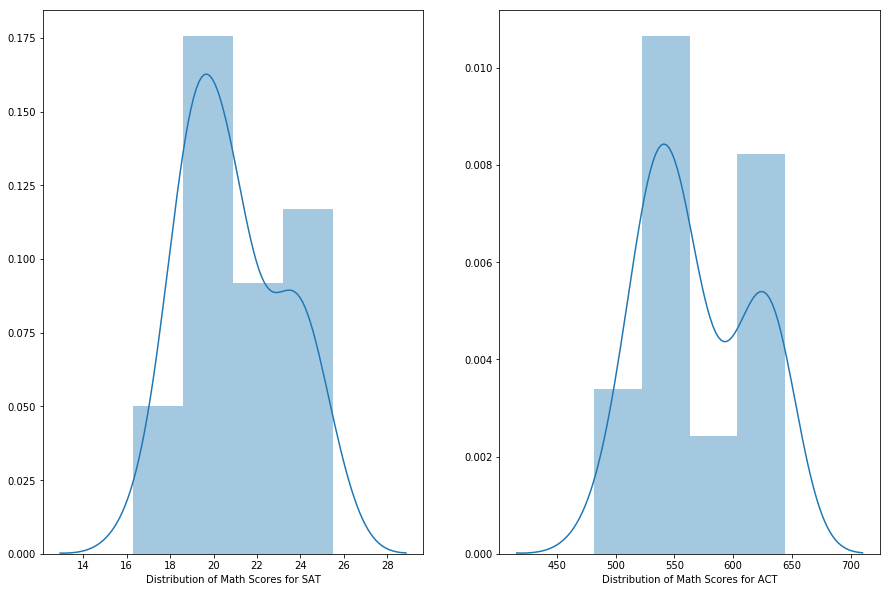

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sns.distplot(act_df['English'], ax=ax[0])
ax[0].set_xlabel('Distribution of Math Scores for SAT')

sns.distplot(sat_df['Evidence-Based Reading and Writing'],ax=ax[1])
ax[1].set_xlabel('Distribution of Math Scores for ACT')


##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

A common assumption about things like test scores is that they're normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

None of the distributions above look normal to me. I suppose you could try to argue that the Central Limit theorem applies here since we're certainly taking lots of samples, but this doesn't really make sense to me. The samples means are incredibly contrived in that they are the state averages.


If we believe the Nation has a particular distribution of scores, then we should think the same thing about the states, and there's no reason to think (a priori) that the mean of the states themselves should actually give a good picture of the average of the whole test taking population.  

##### 21. Plot some scatterplots examining relationships between all variables.

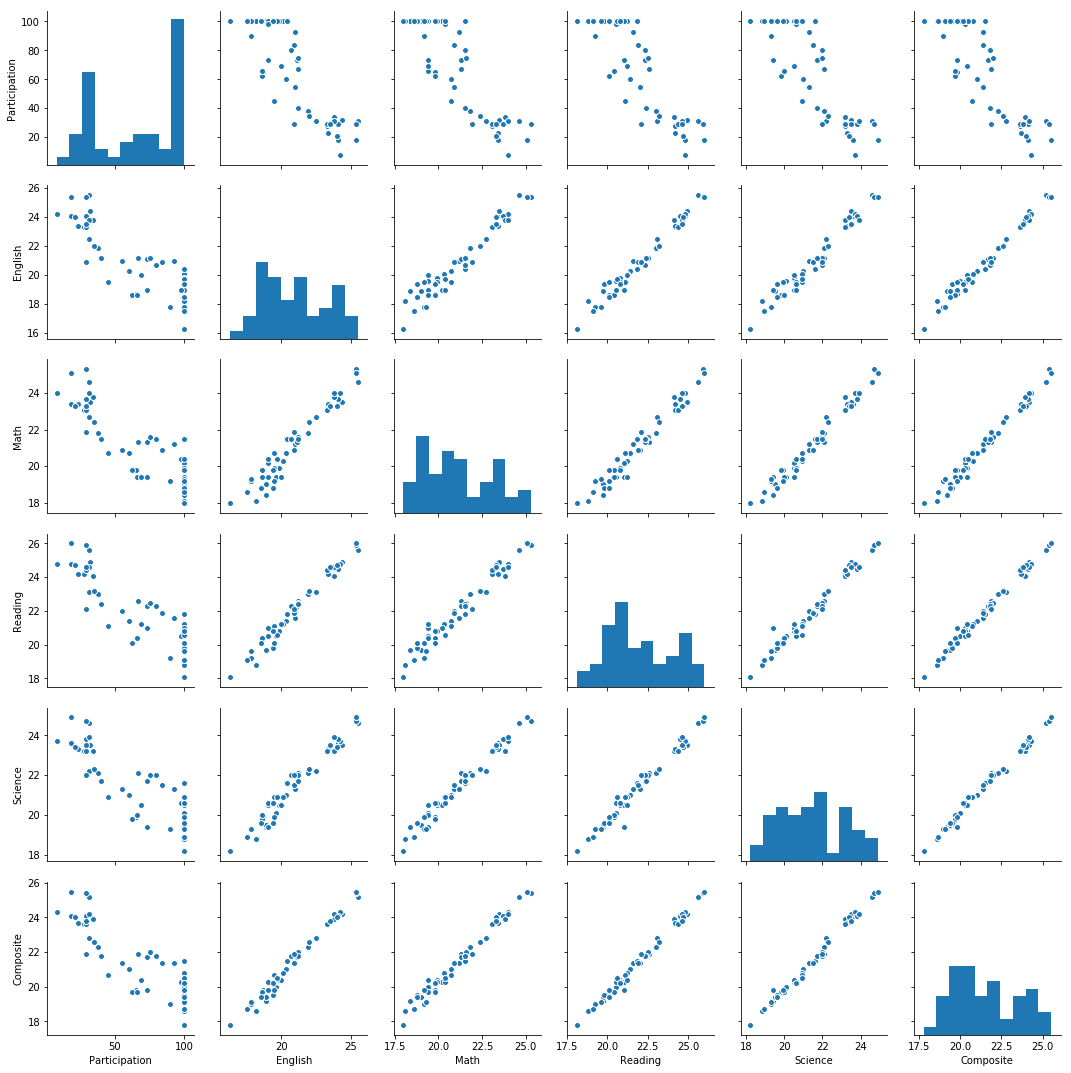

In [48]:
sns.pairplot(act_df)

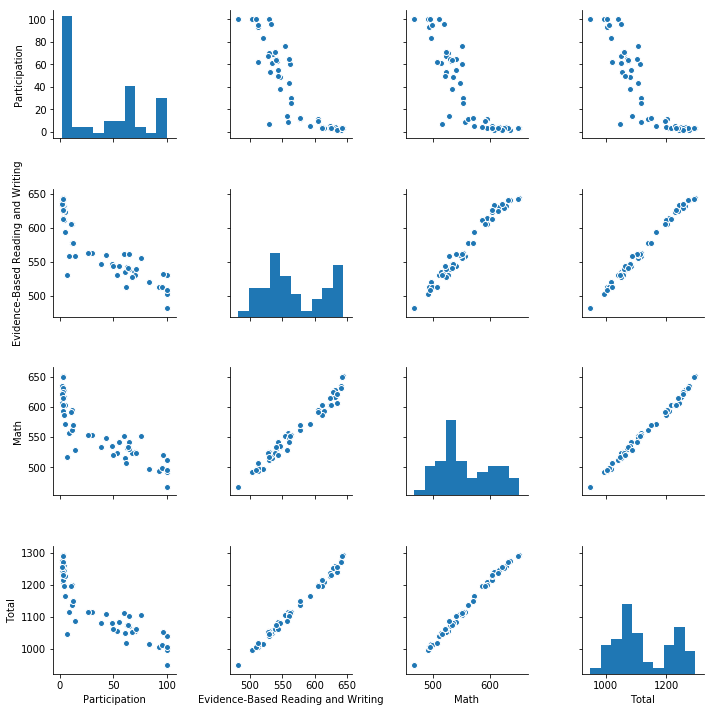

In [49]:
sns.pairplot(sat_df)

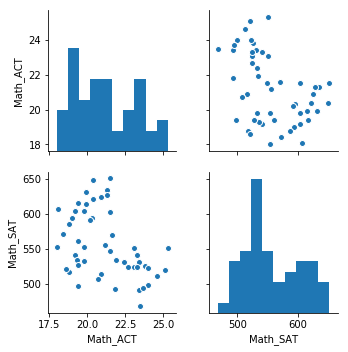

In [50]:
sns.pairplot(combined[['Math_ACT','Math_SAT']])

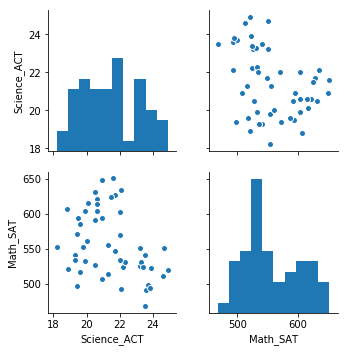

In [51]:
sns.pairplot(combined[['Science_ACT','Math_SAT']])

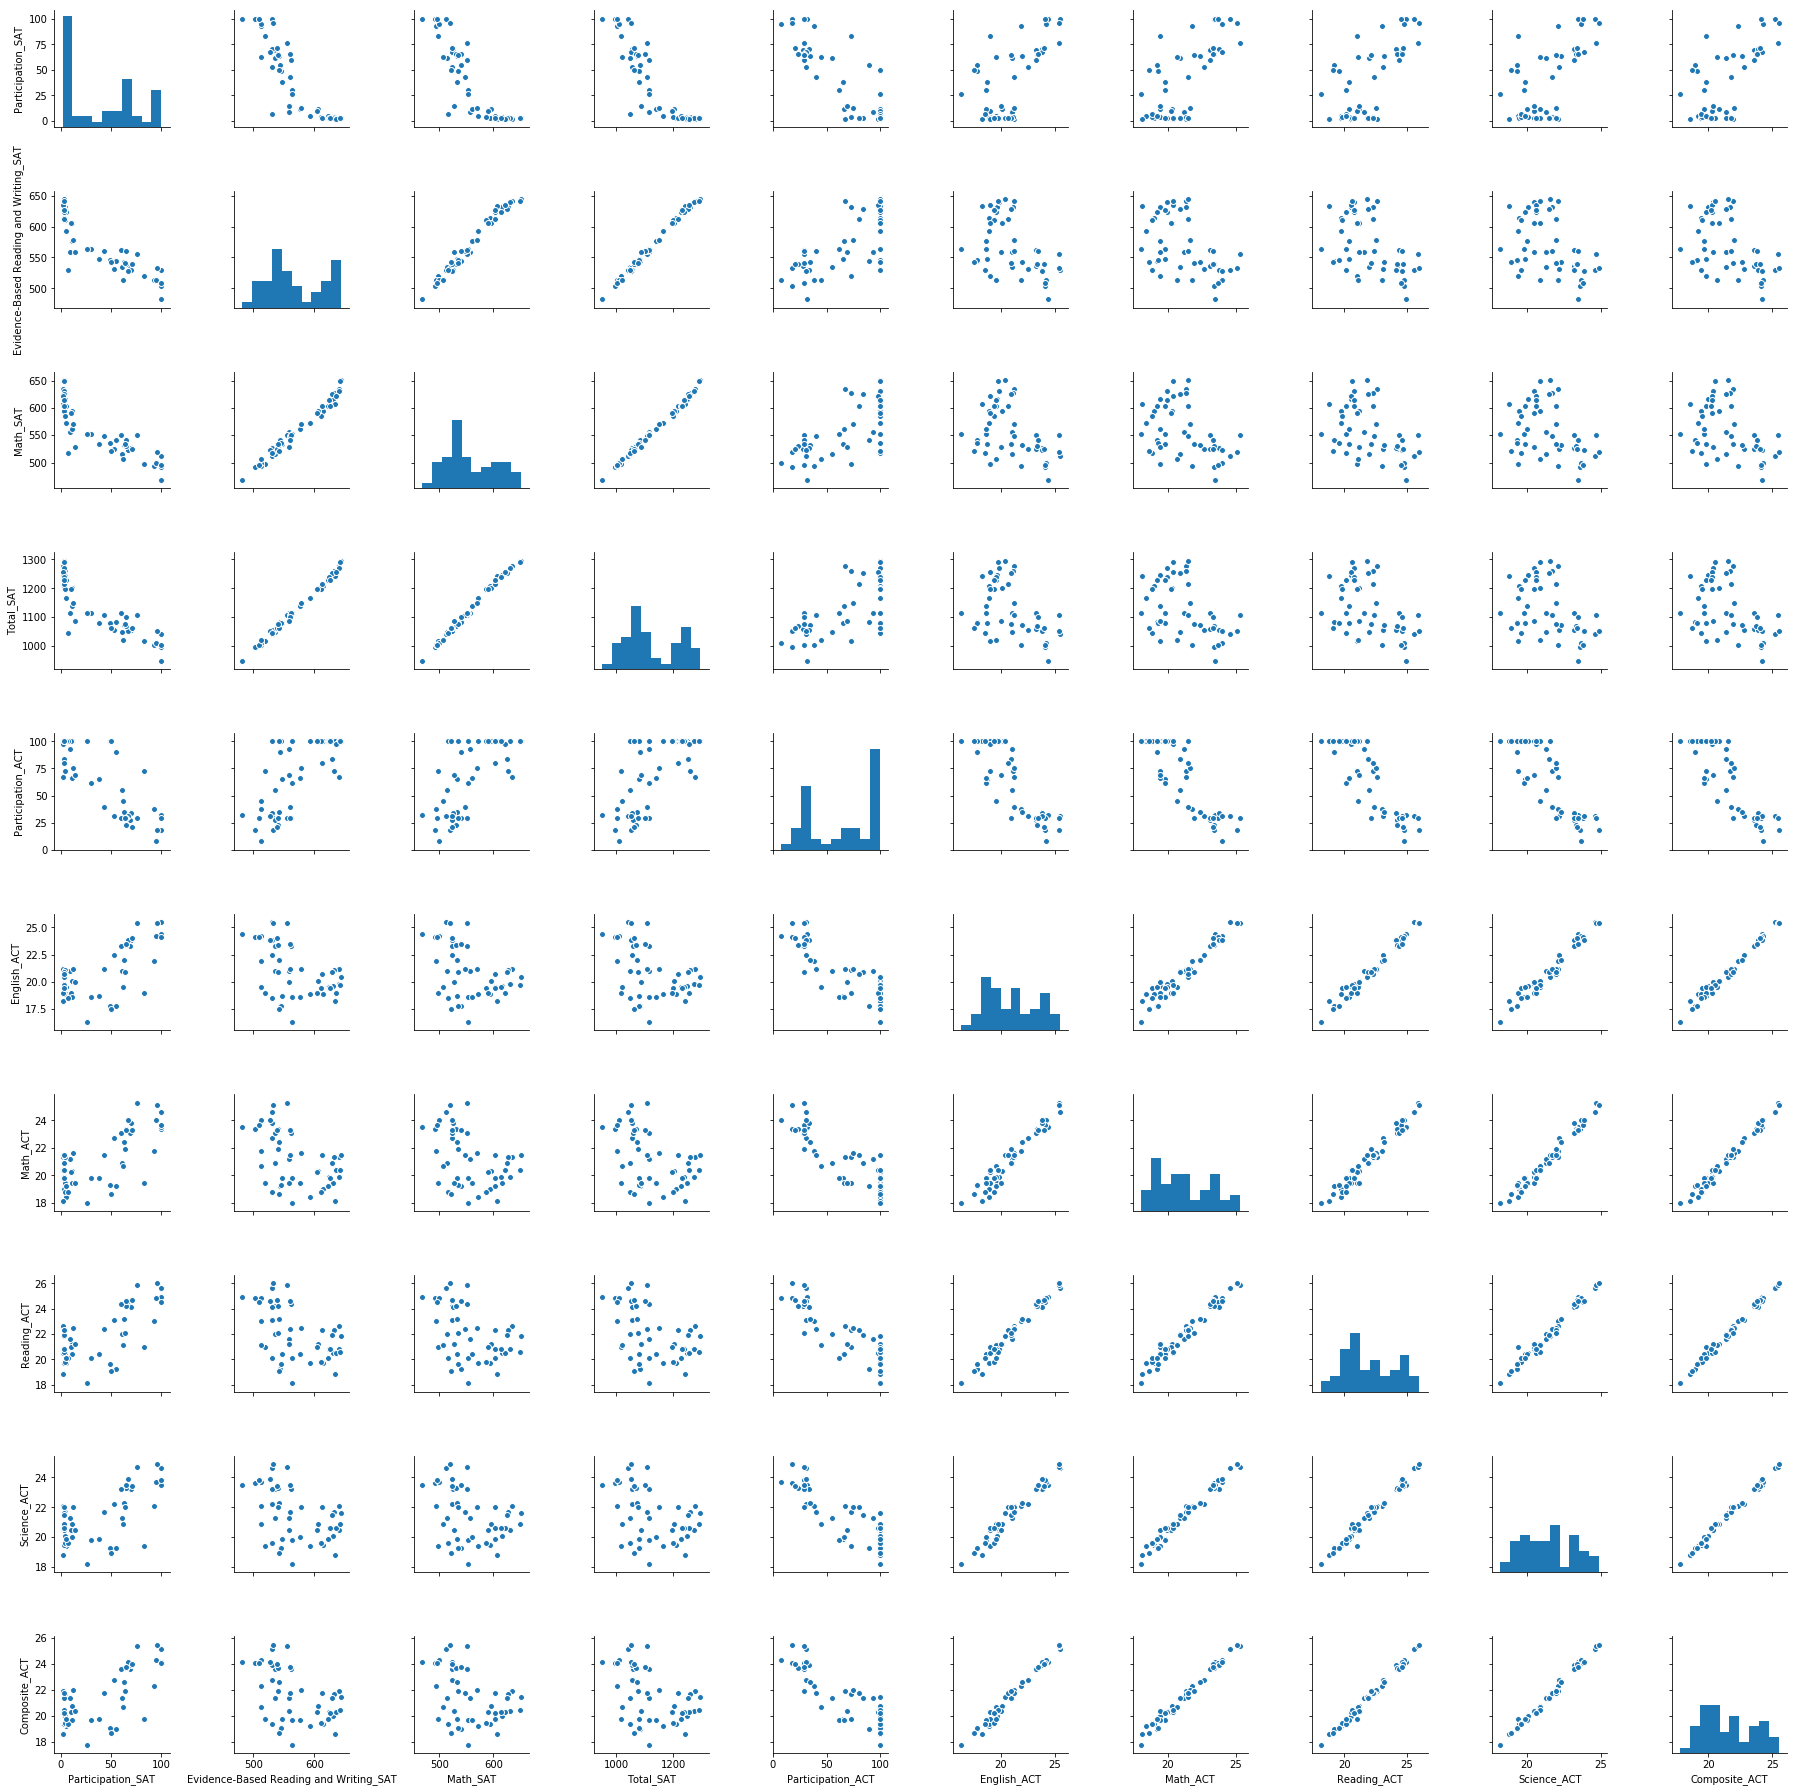

In [52]:
sns.pairplot(combined.drop(combined[combined['State'] == 'Standard Deviation'].index))

##### 22. Are there any interesting relationships to note?

>Positive correlation between Participation in SAT and Scores on ACT  
>Positive correlation between Participation in ACT and Scores on SAT

>Negative correlation between Participation in SAT and Scores on SAT  
>Negative correlation between Participation in ACT and Scores on ACT

##### 23. Create box plots for each variable. 

Box plots for ACT scores.

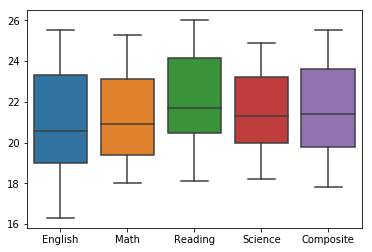

In [53]:
sns.boxplot(data=act_df.drop(columns=['Participation']))

Box plot for ACT participation

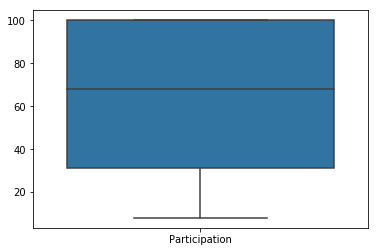

In [54]:
sns.boxplot(data=act_df[['Participation']])

Box plot for the two constituent tests in the SAT

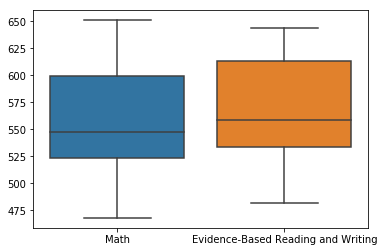

In [55]:
sns.boxplot(data=sat_df[['Math','Evidence-Based Reading and Writing']])

Box plot for total score in SAT

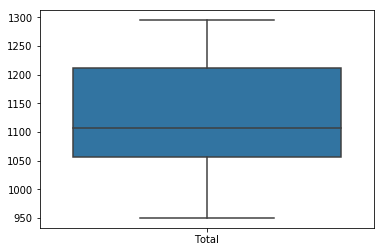

In [56]:
sns.boxplot(data=sat_df[['Total']])

Box plot for participation rate for SAT

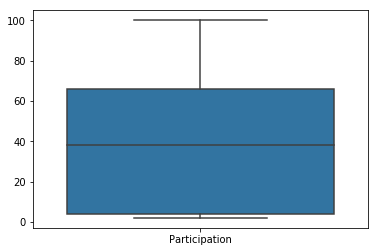

In [57]:
sns.boxplot(data=sat_df[['Participation']])

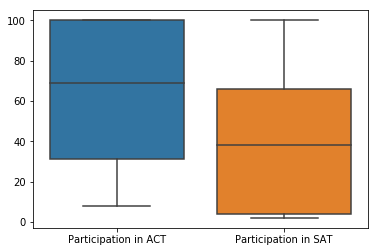

In [58]:
data = {
    'Participation in ACT':combined['Participation_ACT'],
    'Participation in SAT':combined['Participation_SAT'],
}

sns.boxplot(data=pd.DataFrame(data))


## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [59]:
combined_desc = combined.describe().drop(['Participation_ACT','Participation_SAT'], axis=1)

In [60]:
for column in combined_desc:
    subject, test = column.split('_')
    info = combined_desc[column]
    message = f'''
    Some summary statistics for the {subject} section of the {test} is as follows
     Mean:                {info['mean']}
     Standard Deviation:  {info['std']}
     Maximum:             {info['max']}
     Minimum:             {info['min']}
    '''
    print(message)


    Some summary statistics for the Evidence-Based Reading and Writing section of the SAT is as follows
     Mean:                569.1176470588235
     Standard Deviation:  45.66690138768932
     Maximum:             644.0
     Minimum:             482.0
    

    Some summary statistics for the Math section of the SAT is as follows
     Mean:                556.8823529411765
     Standard Deviation:  47.12139516560329
     Maximum:             651.0
     Minimum:             468.0
    

    Some summary statistics for the Total section of the SAT is as follows
     Mean:                1126.0980392156862
     Standard Deviation:  92.49481172519046
     Maximum:             1295.0
     Minimum:             950.0
    

    Some summary statistics for the English section of the ACT is as follows
     Mean:                20.931372549019606
     Standard Deviation:  2.35367713980303
     Maximum:             25.5
     Minimum:             16.3
    

    Some summary statistics for the M

None of the distributions seem like they are draw

In [61]:
#fig,ax = plt.subplots(figsize=(15,10))
combined.drop('State', axis=1).apply(lambda x: scipy.stats.normaltest(x))

Participation_SAT                         (24.844012826931053, 4.028943345766873e-06)
Evidence-Based Reading and Writing_SAT        (13.81815328788405, 0.0009986795076584)
Math_SAT                                    (5.762201767738943, 0.056072998982864684)
Total_SAT                                   (9.607185954097002, 0.008200230814088539)
Participation_ACT                         (72.50510406893655, 1.8018419611696254e-16)
English_ACT                                  (4.945616782086351, 0.08434764489205682)
Math_ACT                                     (6.547294554392776, 0.03786805958606832)
Reading_ACT                                  (6.248639549660324, 0.04396683079879635)
Science_ACT                                   (5.501326521192349, 0.0638854744336635)
Composite_ACT                                (6.557389886662569, 0.03767739587231253)
dtype: object

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

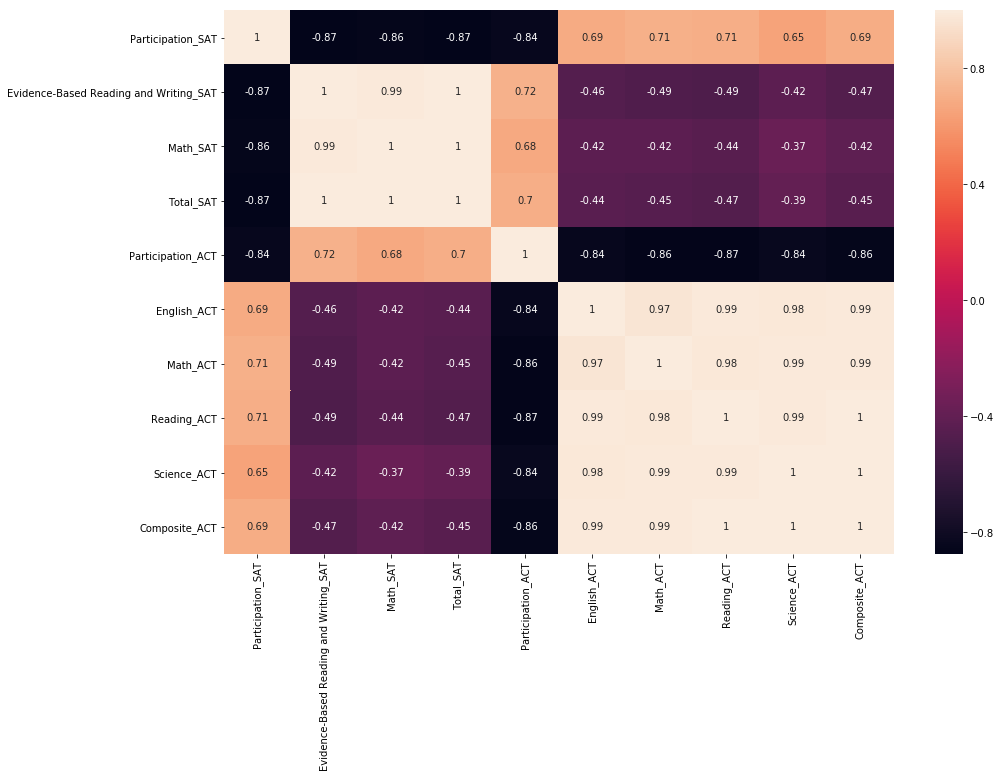

In [62]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(combined.corr(),annot=True)

For a given test, all measure of performatnce highly correclate, ie the correlation between Math and English on the SAT is $0.99$. In comparing the two tests, we see that all measures of performance are negatively correlated between the two tests, ranging from $-.49$ to $-.37$. 

Participation rate for ACT correlates negatively with ACT scores but positively with SAT scores. Similarly participation rate for SAT correlates negatively with SAT scores but positively with ACT scores.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

>H0:  The participation rates are the same for SAT and ACT.

>H1:  The participation rates are not the same for SAT and ACT.

In [69]:
a_p = act_df['Participation']
s_p = sat_df['Participation']
scipy.stats.ttest_ind(a_p,s_p,equal_var=False)

Ttest_indResult(statistic=3.8265392798908344, pvalue=0.00022705523742940916)

The p-value is below the threshold $\alpha=.05$ so we should reject the Null hypothesis.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [70]:
scipy.stats.norm.interval(0.05,a_p.mean())

(65.09113937590294, 65.21655293178938)

In [71]:
scipy.stats.norm.interval(.05,s_p.mean())

(39.74121479068424, 39.866628346570664)

If we resampled in the same way as the originial data was collected, in $95%$ of the samples, the true mean should be somewhere in the confidence interval.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No. The pvalue in 26 was low enough so as to reject then null hypothesis and the intervals generated in 27 do not overlap.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Given that their scales are so different, it's difficult to give real meaning to these statistics compartively. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No. There's no sense in which the information can be resampled over time other than artifically.

I'm not even really conviced that it makes sense to interpret the output of `scipy.stats.ttest_ind_from_stats` since this is like treating the data provided as a sample of some larger collection of states, and trying to find the average participation in a test among the states.